In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
data1=pd.read_csv("titanic-passengers.csv",sep="\;")

data1.head(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"""Nakid, Miss. Maria (""""Mary"""")""",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"""Lovell, Mr. John Hall (""""Henry"""")""",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.drop(["Embarked","Cabin"],axis=1,inplace=True)

In [ ]:
data["PassengerId"]=[i for i in range(data.shape[0])]
data.drop(["Name","PassengerId","Ticket","Fare"],axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,No,2,male,28.0,0,0
1,No,3,male,25.0,0,0
2,No,3,male,20.0,0,0
3,No,3,female,29.0,0,4
4,No,1,male,31.0,1,0


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data1["Survived"]=lb.fit_transform(data1["Survived"])

In [ ]:
data1["Sex"]=lb.fit_transform(data1["Sex"])

In [ ]:
data.head(40)

In [ ]:
data.isnull().sum()

In [ ]:
data1[data1["Survived"]==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,382,1,3,"""Nakid, Miss. Maria (""""Mary"""")""",0,1.0,0,2,2653,15.7417,NaN,C
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,SC/AH 3085,26.0000,NaN,S
12,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",0,48.0,1,2,220845,65.0000,NaN,S
19,225,1,1,"Hoyt, Mr. Frederick Maxfield",1,38.0,1,0,19943,90.0000,C93,S
20,83,1,3,"McDermott, Miss. Brigdet Delia",0,NaN,0,0,330932,7.7875,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
879,275,1,3,"""Healy, Miss. Hanora """"Nora""""""",0,NaN,0,0,370375,7.7500,NaN,Q
880,360,1,3,"""Mockler, Miss. Helen Mary """"Ellie""""""",0,NaN,0,0,330980,7.8792,NaN,Q
882,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.0,1,3,29105,23.0000,NaN,S
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data1.drop(["PassengerId","Name","Embarked","Cabin","Fare","Ticket"],axis=1,inplace=True)

In [ ]:
meanS=data1[data1["Survived"]==1]["Age"].mean()

28.343689655172415

In [ ]:
meanNS=data1[data1["Survived"]==0]["Age"].mean()

In [ ]:
condition =data[(data["Survived"]==1)&(data["Age"].isnull()==True)]

In [ ]:
data1["age"]=np.where(pd.isnull(data1.Age) & data1["Survived"]==1 ,meanS,data1["Age"])
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,age
0,0,2,1,28.0,0,0,28.0
1,0,3,1,25.0,0,0,25.0
2,0,3,1,20.0,0,0,20.0
3,0,3,0,29.0,0,4,29.0
4,0,1,1,31.0,1,0,31.0
...,...,...,...,...,...,...,...
886,1,2,0,14.0,1,0,14.0
887,0,3,1,22.0,0,0,22.0
888,0,3,0,30.0,0,0,30.0
889,0,3,1,NaN,0,0,NaN


In [ ]:
data1.isnull().sum()

In [ ]:
data1.drop("age",axis=1,inplace=True)

In [ ]:
data1.dropna(inplace=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [ ]:
x=data1.drop("Survived",axis=1).values
y=data1["Survived"].values

In [ ]:
y.shape

(714,)

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train ,y_test =train_test_split(x,y,test_size=0.3,random_state=0)

In [149]:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8093023255813954

In [150]:
model.score(x_train,y_train)

0.9298597194388778

In [151]:
model.score(x_test,y_test)

0.8093023255813954

In [148]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[124,   6],
       [ 26,  59]])

In [ ]:
from sklearn import tree

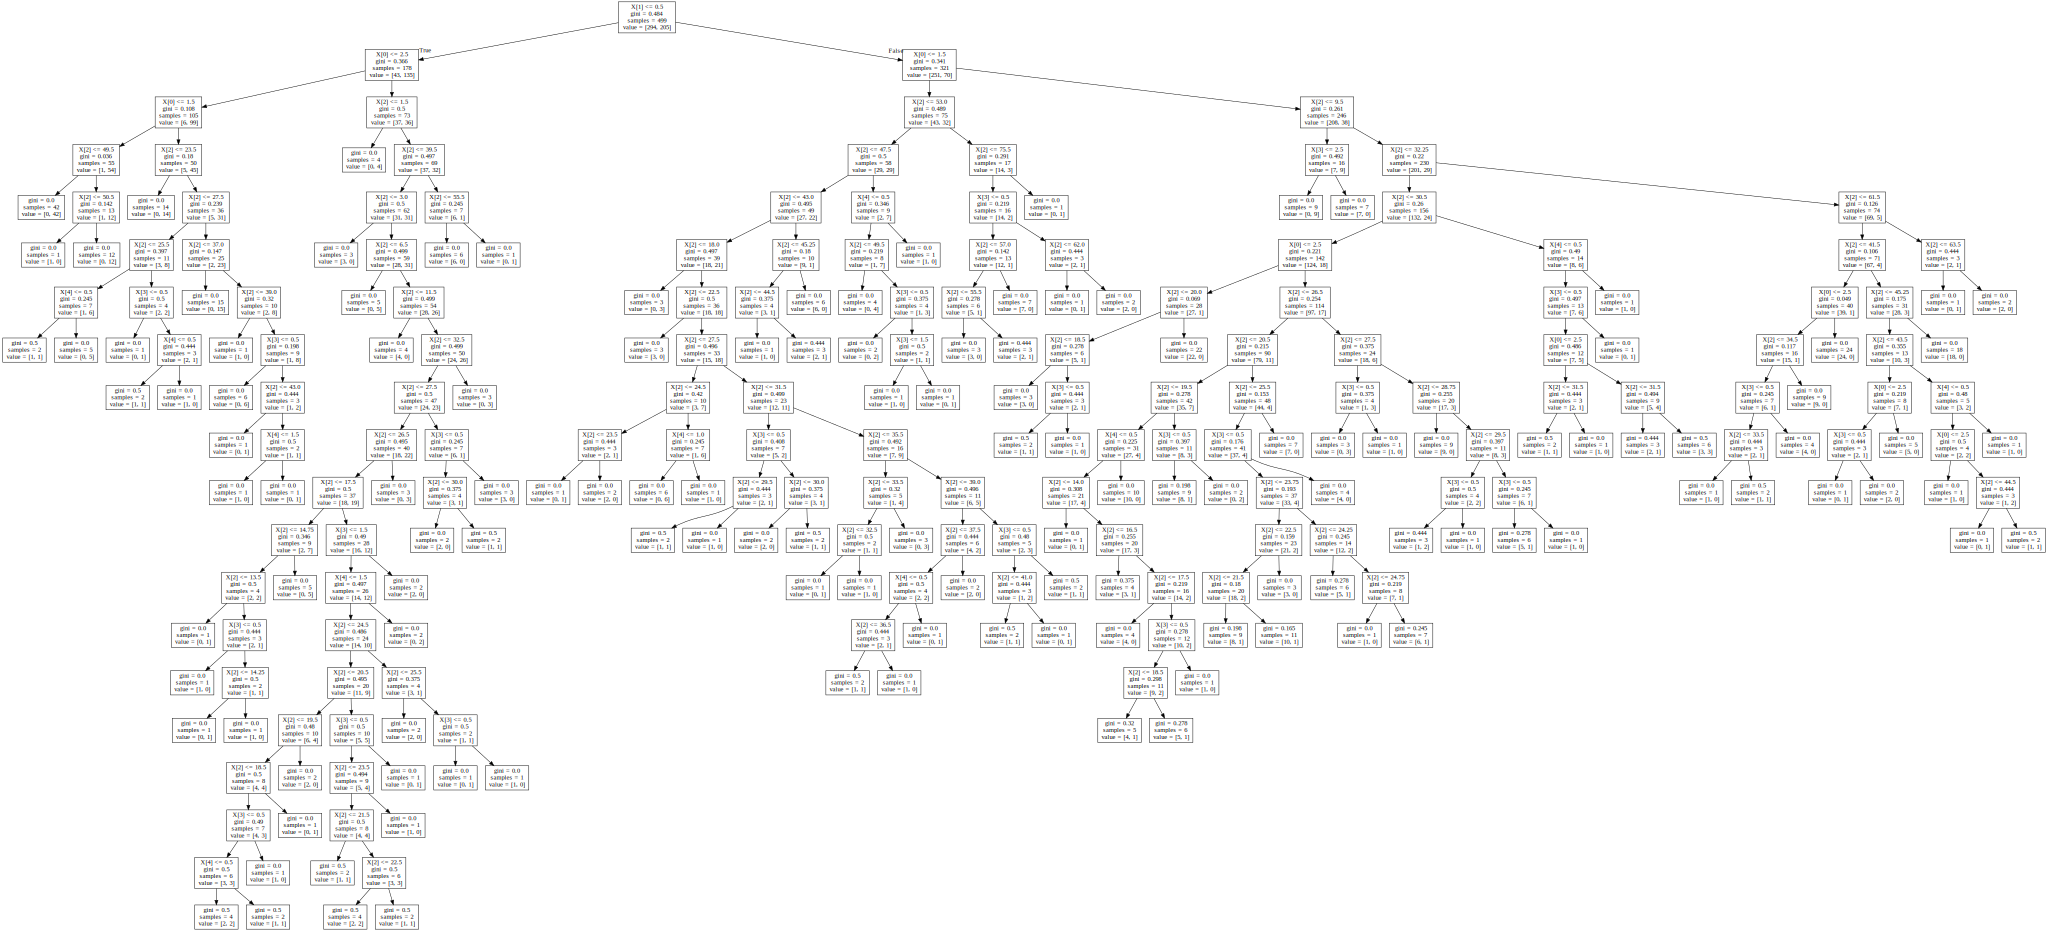

In [140]:
import graphviz
df=tree.export_graphviz(model,out_file=None)
graph=graphviz.Source(df)
graph.render("data1")
graph